In [3]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if interArea == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = abs((boxA[2] - boxA[0]) * (boxA[3] - boxA[1]))
    boxBArea = abs((boxB[2] - boxB[0]) * (boxB[3] - boxB[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [4]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/yolov5x-bs16/weights/best.pt')  # local model

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-12 Python-3.8.13 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 444 layers, 86173414 parameters, 0 gradients
Adding AutoShape... 


In [8]:
# CONSTANTS
BOUNDING_BOXES = [
    [502, 344, 61, 86],
    [627, 427, 193, 93],
    [522, 654, 90, 85],
    [704, 594, 90, 80],
    [545, 577, 81, 75],
    [460, 700, 52, 80]
]

SEED = 432904 # For random functions

In [10]:
XYXY_BOUNDING_BOXES = []
for X,Y,W,H in BOUNDING_BOXES:
    XYXY_BOUNDING_BOXES.append([X,Y,X+W, Y+H])

In [40]:
# Get filenames labels for the images
import random
import os
import shutil
import glob
from PIL import Image, ImageDraw

def get_filenames(folder):
    filenames = []

    for path in glob.glob(os.path.join(folder, '*.jpg')):
        # Extract the filename
        filenames.append(path)

    return filenames

images = get_filenames("./video_frames")
random.Random(SEED).shuffle(images) # Shuffle Dataset
N = len(images)

In [71]:
from tqdm.notebook import tqdm

count = [0 for i in range(6)]
for i in tqdm(range(1,N+1)):
    img_path = f'./video_frames/frame_{i}.jpg'
    prediction = model(img_path)
    box_predictions = prediction.xyxy[0]
    for i, BOX in enumerate(XYXY_BOUNDING_BOXES):
        for prediction in box_predictions:
            predict_box = prediction.tolist()[:4]
            iou = bb_intersection_over_union(predict_box, BOX)
            if iou > 0.01:
                # print(iou)
                count[i] += 1
                break
    if (i % 1000 == 0):
        print(count)
print(count)

  0%|          | 0/13501 [00:00<?, ?it/s]

[4886, 3189, 1512, 8531, 525, 2450]


In [70]:
from tqdm.notebook import tqdm

# Threshold of 0.3
count = [0 for i in range(6)]
for i in tqdm(range(1,N+1)):
    img_path = f'./video_frames/frame_{i}.jpg'
    prediction = model(img_path)
    box_predictions = prediction.xyxy[0]
    for i, BOX in enumerate(XYXY_BOUNDING_BOXES):
        for prediction in box_predictions:
            pred = prediction.tolist()
            predict_box = pred[:4]
            if pred[4] < 0.3:
                continue
            iou = bb_intersection_over_union(predict_box, BOX)
            if iou > 0.01:
                # print(iou)
                count[i] += 1
                break
    if (i % 1000 == 0):
        print(count)
print(count)

  0%|          | 0/13501 [00:00<?, ?it/s]

[4886, 3180, 1507, 8384, 520, 2392]


In [ ]:
from tqdm.notebook import tqdm

# Threshold of 0.3
count = [0 for i in range(6)]
for i in tqdm(range(1,N+1)):
    img_path = f'./video_frames/frame_{i}.jpg'
    prediction = model(img_path)
    box_predictions = prediction.xyxy[0]
    for i, BOX in enumerate(XYXY_BOUNDING_BOXES):
        for prediction in box_predictions:
            pred = prediction.tolist()
            predict_box = pred[:4]
            if pred[4] < 0.3:
                continue
            iou = bb_intersection_over_union(predict_box, BOX)
            if iou > 0.01:
                # print(iou)
                count[i] += 1
                break
    if (i % 1000 == 0):
        print(count)
print(count)

In [41]:
count

[5244, 6073, 1537, 9337, 104, 2594]

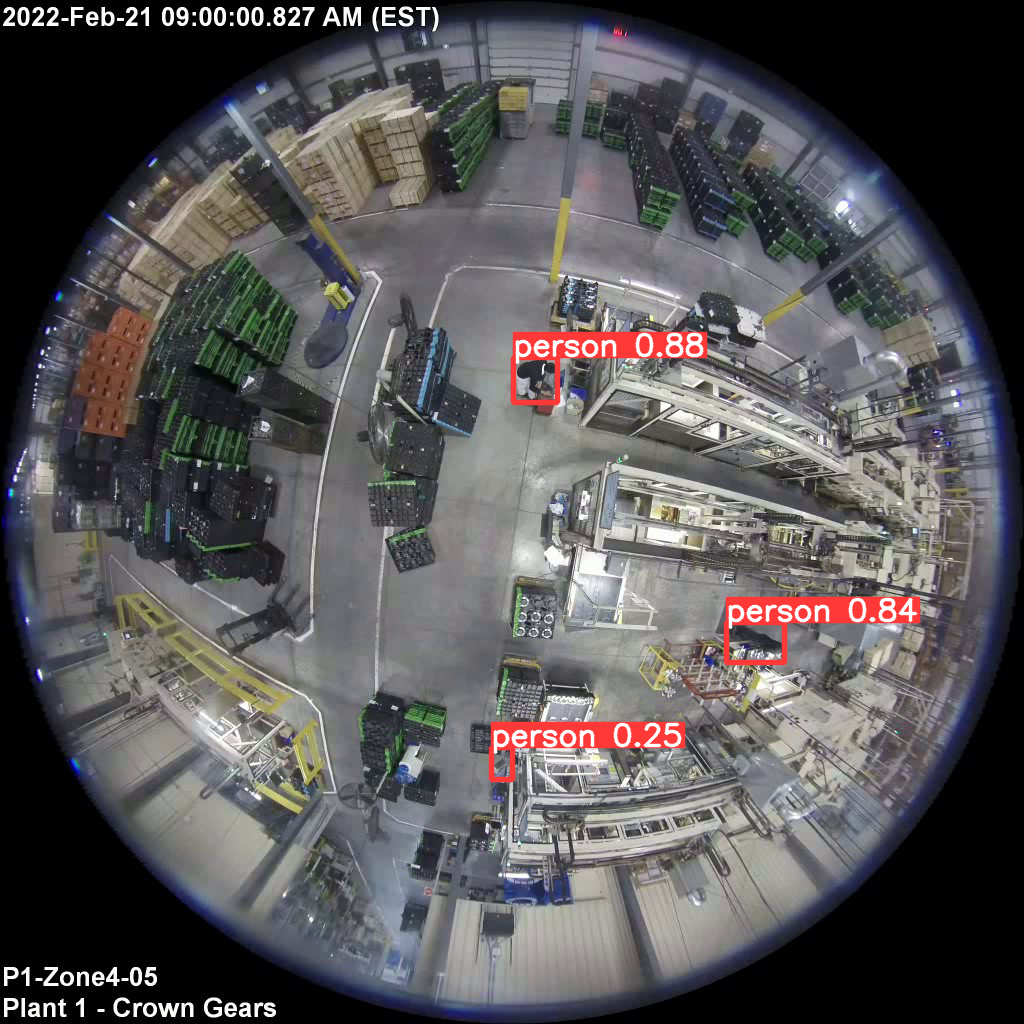

[513.5380249023438, 357.969970703125, 557.0816040039062, 402.407958984375, 0.8825960159301758, 0.0]
[726.6013793945312, 622.5619506835938, 784.9622192382812, 662.1077270507812, 0.8382890820503235, 0.0]
[491.7466735839844, 747.150634765625, 512.3983764648438, 779.446533203125, 0.2521681487560272, 0.0]
[1, 0, 0, 1, 0, 1]


In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
%matplotlib inline

count = [0 for i in range(6)]
i = 6
img_path = f'./video_frames/frame_{i}.jpg'
prediction = model(img_path)
box_predictions = prediction.xyxy[0]
prediction.show()
for i, BOX in enumerate(XYXY_BOUNDING_BOXES):
    for prediction in box_predictions:
        predict_box = prediction.tolist()[:4]
        iou = bb_intersection_over_union(predict_box, BOX)
        if iou > 0.01:
            print(prediction.tolist())
            # print(iou)
            count[i] += 1
            break
print(count)
# def draw_ROIs_on_image(img_path):
#     img = mpimg.imread(img_path)
#     plt.axis('off')
#     plt.imshow(img)
#     for roi in range(len(BOUNDING_BOXES)):
#         x = BOUNDING_BOXES[roi][0]
#         y = BOUNDING_BOXES[roi][1]
#         w = BOUNDING_BOXES[roi][2]
#         h = BOUNDING_BOXES[roi][3]

#         # Create a Rectangle patch
#         rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

#         plt.gca().add_patch(rect) # Add the patch to the Axes

# draw_ROIs_on_image(img_path)
